In [0]:
# import libraries


import pandas as pd
import numpy as np
import urllib
from urllib.parse import unquote
import urllib.parse
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline



                                                                            #######################
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():                                                            # comment this section & give path below 
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

                                                                            ########################  




data=pd.read_csv('sample_data.csv',encoding='utf-8')




columns=['session id', 'uuid', 'timestamp', 'location', 'location path','location query', 'referral location', \
         'ua_string', 'geo_ip']




# convert data to native language
data["location query"]=data["location query"].map(lambda x:urllib.parse.unquote(x))

Saving sample_data.csv to sample_data (3).csv
User uploaded file "sample_data.csv" with length 152755 bytes


In [0]:
pip install pyyaml ua-parser user-agents

  Stored in directory: /root/.cache/pip/wheels/48/41/70/1ba4d8c9bbca8a54fac6827bc7c48c93d5b44d94829facecba
Successfully built user-agents


In [0]:
from user_agents import parse

In [0]:
#UA string identifies the browser, OS and device




def ua(x):
  v2=parse(x)
  #return [v2.browser.family, v2.browser.version_string, v2.os.family, v2.os.version_string, v2.device.family, v2.device.brand, v2.device.model ,str(v2)]
  return str(v2)


df = pd.DataFrame(columns=['info'])
df['ua_string']=data['ua_string'].copy()

df['info']=data['ua_string'].apply(ua)



df[['device','os','broswer']]=df['info'].str.split('/', expand=True)     # split data into 3 column 
df['top devices used']=''                                                     # insert new column to get easy analysis
df['top os used']=''
df['top browser used']=''
df['count']=''



df=df.drop(['info','ua_string'], axis=1)                               # columns are seperate in os, device, broswer format so drop unwanted columns
#df111=df11[['device','os',]].groupby(['device']).count()

device=df[['device','top devices used']].groupby(['device']).count()
device=device.sort_values(by=['top devices used'],ascending=False)
device=device[0:10]

os=df[['os','top os used']].groupby(['os']).count()
os=os.sort_values(by=['top os used'],ascending=False)
os=os[0:10]


browser=df[['broswer','top browser used']].groupby(['broswer']).count()
browser=browser.sort_values(by=['top browser used'],ascending=False)
browser=browser[0:10]


df14=df[['os','broswer','count']].groupby(['broswer','os']).count()
df14=df14.sort_values(by=['count'],ascending=False)
df14=df14[0:10]


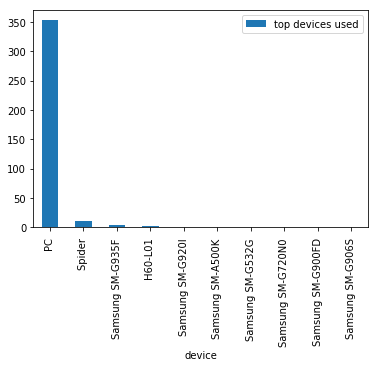

In [0]:
device.plot.bar()


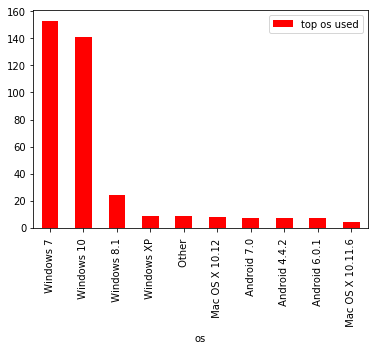

In [0]:
os.plot.bar(color='r')

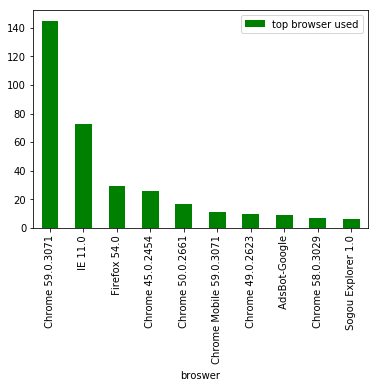

In [0]:
browser.plot.bar(color='g')

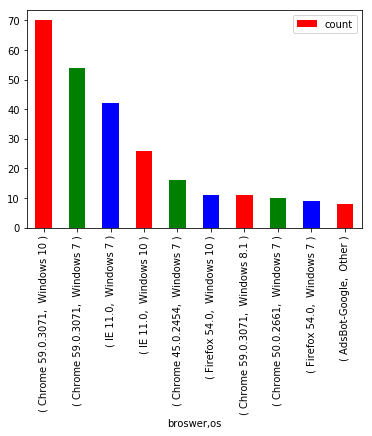

In [0]:
df14.plot.bar(color='rgb')

In [0]:
# location query analysis

df2 = pd.DataFrame(columns=['location query'])
df2['location query']=data['location query'].copy()


keyword =df2[df2['location query'].str.startswith("keyword=") ]
n_media =df2[df2['location query'].str.startswith("n_media") ]
utm_source=df2[df2['location query'].str.startswith('utm_source')]
bottom=df2[df2['location query'].str.startswith('bottom')]




keyword[['keyword','matchtype','device','creative','gclid']]=keyword['location query'].str.split('&', expand=True) 
keyword['top keyword']=''


keyword['keyword'] = keyword['keyword'].map(lambda x: x[8:])
keyword['matchtype'] = keyword['matchtype'].map(lambda x: x[10:])
keyword['device'] = keyword['device'].map(lambda x: x[7:])
keyword['creative'] = keyword['creative'].map(lambda x: x[9:])
keyword['top creative']=''


topkeyword1=keyword[['keyword','top keyword']].groupby(['keyword']).count()
topkeyword1=topkeyword1.sort_values(by=['top keyword'],ascending=False)
topkeyword1=topkeyword1[0:10]


topcreative=keyword[['creative','top creative']].groupby(['creative']).count()
topcreative=topcreative.sort_values(by=['top creative'],ascending=False)
topcreative=topcreative[0:10]

import warnings
warnings.filterwarnings('ignore')


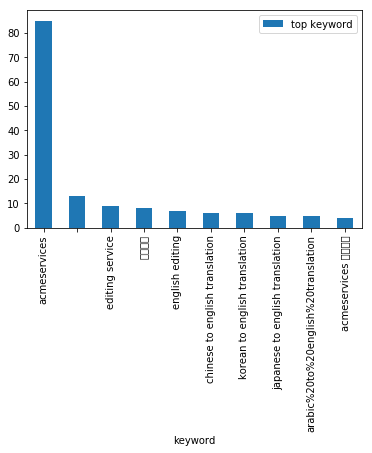

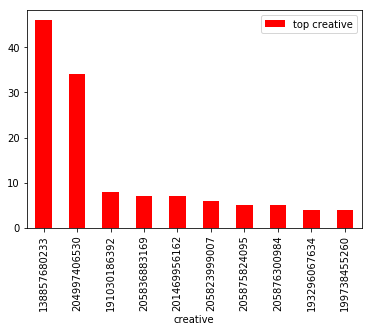

In [0]:
topkeyword1.plot.bar()
topcreative.plot.bar(color='r')

In [0]:
# top media analysis

n_media['location query']=n_media['location query'].map(lambda x: x.replace('n_',''))

n_media[['media','query','rank','ad_group','ad','keyword_id','keyword','campaigtype','NaPm']]=n_media['location query'].str.split('&', expand=True) 

n_media['media']=n_media['media'].map(lambda x: x[6:])
n_media['query']=n_media['query'].map(lambda x: x[6:])
n_media['rank']=n_media['rank'].map(lambda x: x[5:])
n_media['ad_group']=n_media['ad_group'].map(lambda x: x[10:])
n_media['ad']=n_media['ad'].map(lambda x: x[3:])
n_media['keyword_id']=n_media['keyword_id'].map(lambda x: x[11:])
n_media['keyword']=n_media['keyword'].map(lambda x: x[8:])

n_media['campaigtype']=n_media['campaigtype'].map(lambda x: x[12:])
n_media['NaPm']=n_media['NaPm'].map(lambda x: x[5:])


n_media['top media']=''
n_media['top ad group']=''


topmedia=n_media[['media','top media']].groupby(['media']).count()
topmedia=topmedia.sort_values(by=['top media'],ascending=False)
topmedia=topmedia[0:10]


topad=n_media[['ad_group','top ad group']].groupby(['ad_group']).count()
topad=topad.sort_values(by=['top ad group'],ascending=False)
topad=topad[0:10]



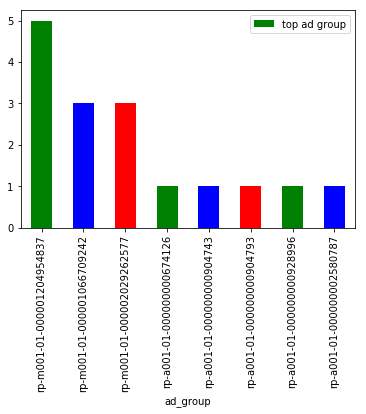

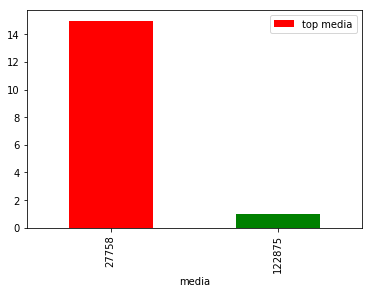

In [0]:
topad.plot.bar(color='gbr')
topmedia.plot.bar(color='rgb')

In [0]:
# some word analysis

dw=data[['location query']]

In [0]:
# remove special characters, numbers, punctuations
dw['location query'] = dw['location query'].str.replace("[^a-zA-Z#]", " ")


In [0]:
df_token = dw['location query'].apply(lambda x: x.split())              # Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
  

from nltk.stem.porter import *
stemmer = PorterStemmer()

df_token = df_token.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
df_token.head()




0    [keyword, edit, paper, matchtyp, e, devic, c, ...
1    [keyword, profession, edit, servic, matchtyp, ...
2    [keyword, academ, proofread, matchtyp, p, devi...
3    [keyword, languag, edit, servic, matchtyp, p, ...
4    [keyword, languag, edit, matchtyp, p, devic, c...
Name: location query, dtype: object

In [0]:
# Now let’s stitch these tokens back together

for i in range(len(df_token)):
    df_token[i] = ' '.join(df_token[i])

dw['location query'] = df_token

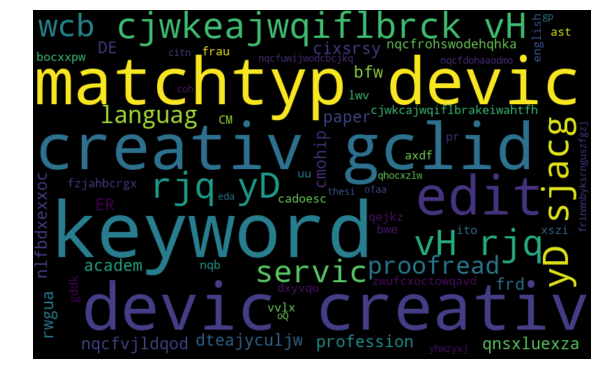

In [0]:
# Understanding the common words used
all_words = ' '.join([text for text in dw['location query']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words[:1000])

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# remove special characters, numbers, punctuations


utm_source['location query'] = utm_source['location query'].str.replace("[^a-zA-Z#]", " ")


utm_source['token'] = utm_source['location query'].apply(lambda x: x.split())              # Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
  
#utm_source[0:10]['location query'].values


utm_source['medium']=utm_source[['location query']]

utm_source['medium']=utm_source['location query'].map(lambda s: s[s.find('medium')+len('medium'):s.rfind('utm')])
utm_source['campaign']=utm_source['location query'].map(lambda s: s[s.find('campaign')+len('campaign'):s.rfind('')])
utm_source['term']=utm_source['location query'].map(lambda s: s[s.find('term')+len('term'):s.rfind('')])
#utm_source['content']=utm_source['location query'].map(lambda s: s[s.find('content')+len('content'):s.rfind('')])


utm_source['medium']=utm_source['medium'].map(lambda s: s[0 :s.rfind('utm')])
utm_source['campaign']=utm_source['campaign'].map(lambda s: s[0 :s.rfind('utm')])
utm_source['term']=utm_source['term'].map(lambda s: s[0 :s.rfind('utm')])

utm_source1=utm_source
utm_source1.drop(['location query','token'],axis=1)[0:5]


utm_source1['medium cnt']=''
utm_source1['campaign cnt']=''
utm_source1['term cnt']=''
medium=utm_source1[['medium','medium cnt']].groupby(['medium']).count()
term=utm_source1[['term','term cnt']].groupby(['term']).count()
campaign=utm_source1[['campaign','campaign cnt']].groupby(['campaign']).count()


medium=medium.sort_values(by=['medium cnt'],ascending=False)
medium=medium[0:10]


term=term.sort_values(by=['term cnt'],ascending=False)
term=term[0:10]


campaign=campaign.sort_values(by=['campaign cnt'],ascending=False)
campaign=campaign[0:10]




In [0]:
pip install xlsxwriter


     |████████████████████████████████| 143kB 4.7MB/s 


In [0]:
import xlsxwriter


UA  = pd.DataFrame(columns=['UA STRING ANALYSIS'])
Location= pd.DataFrame(columns=['KEYWORD ANALYSIS'])
MEDIA=pd.DataFrame(columns=['MEDIA ANALYSIS'])





#writer.sheets['Report'] = worksheet


# Creating Excel Writer Object from Pandas 

writer = pd.ExcelWriter('Report output.xlsx',engine='xlsxwriter')   
workbook=writer.book
worksheet=workbook.add_worksheet('Report')
writer.sheets['Report'] = worksheet

UA.to_excel(writer,sheet_name='Report',startrow=0, startcol=2) 
Location.to_excel(writer,sheet_name='Report',startrow=13, startcol=2) 
MEDIA.to_excel(writer,sheet_name='Report',startrow=26, startcol=2) 


device.to_excel(writer,sheet_name='Report',startrow=1 , startcol=0)   
os.to_excel(writer,sheet_name='Report',startrow=1, startcol=4) 
browser.to_excel(writer,sheet_name='Report',startrow=1, startcol=8) 
df14.to_excel(writer,sheet_name='Report',startrow=1, startcol=12) 


topkeyword1.to_excel(writer,sheet_name='Report',startrow=14, startcol=0) 
topcreative.to_excel(writer,sheet_name='Report',startrow=14, startcol=4) 
topmedia.to_excel(writer,sheet_name='Report',startrow=14, startcol=8) 
topad.to_excel(writer,sheet_name='Report',startrow=14, startcol=12) 

medium.to_excel(writer,sheet_name='Report',startrow=27, startcol=0) 
term.to_excel(writer,sheet_name='Report',startrow=27, startcol=4) 
campaign.to_excel(writer,sheet_name='Report',startrow=27, startcol=8) 






worksheet.conditional_format('A2:B12', {'type': '3_color_scale'})
worksheet.conditional_format('E2:F12' ,{'type':'2_color_scale'})
worksheet.conditional_format('I2:J12', {'type': '3_color_scale'})
worksheet.conditional_format('M2:O12' ,{'type':'3_color_scale'})

worksheet.conditional_format('A15:B25', {'type': '3_color_scale'})
worksheet.conditional_format('E15:F25' ,{'type':'2_color_scale'})
worksheet.conditional_format('I15:J25', {'type': '3_color_scale'})
worksheet.conditional_format('M15:N25' ,{'type':'2_color_scale'})

worksheet.conditional_format('A28:B38' ,{'type':'2_color_scale'})
worksheet.conditional_format('E28:J38', {'type': '3_color_scale'})
worksheet.conditional_format('I28:N38' ,{'type':'2_color_scale'})



writer.save()





